In [73]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import nltk
from nltk import tokenize
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import plotly.graph_objs as go
from plotly.offline import iplot
import cufflinks
import warnings
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

In [66]:
from wordcloud import STOPWORDS
STOPWORDS.update(['rt', 'mkr', 'didn', 'bc', 'n', 'm', 'im', 'll', 'y', 've', 'u', 'ur', 'don', 't', 's'])

In [2]:
def change_directory(path):
    print("Current Working Directory ", os.getcwd())
    os.chdir(path)
    print("Changed Working Directory ", os.getcwd())

In [3]:
def read_data(file):
    data = pd.read_csv(file)
    return data

In [4]:
def cross_tab(data):
    res = data['cyberbullying_type'].value_counts().rename_axis('cyberbullying_type').reset_index(name='counts')
    res['percentage'] = (res['counts']/sum(res['counts'])) * 100
    return res

In [45]:
def frequency_plot(res):
    sns.barplot(x = 'cyberbullying_type',
            y = 'counts',
            data = res,
            palette = "BuGn_r")
    plt.show()

In [6]:
def polarity_score(x):
    if isinstance(x, str):
        polarity = round(TextBlob(x).sentiment.polarity, 4)
    else:
        polarity = 0.1
    if polarity > 0:
        sentiment = "positive"
    elif polarity < 0:
        sentiment = "negative"
    else:
        sentiment = "neutral"
    return sentiment, polarity

In [7]:
def polarity_summary(data):
    summary = data.groupby(['cyberbullying_type','sentiment']).agg(count_sentiment = ('sentiment','count'),
                                                     average_polarity = ('polarity_score','mean')
                                                    ).reset_index()
    return summary

In [98]:
token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", palette = "cyan")
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

In [52]:
def word_cloud(df,category):
    plt.figure(figsize=(20,10))
    subset1 = df[df['cyberbullying_type']==category]
    text_gender = subset1.text.values
    cloud = WordCloud(background_color='black',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_gender))
    plt.axis('off')
    plt.title(category,fontsize=40)
    plt.imshow(cloud)

In [59]:
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = STOPWORDS).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [107]:
def unigrams(df,category):
    subset = df[df['cyberbullying_type'] == category]
    text = subset.text.values
    unigrams = get_top_n_gram(text,(1,1),10)
    dff = pd.DataFrame(unigrams, columns = ['Text' , 'count'])
    dff.groupby('Text').sum()['count'].sort_values(ascending=True).iplot(
    kind='bar', yTitle='Count', linecolor='black',color='darkcyan', title='Top 10 Unigrams',orientation='h')

In [111]:
def bigrams(df,category):
    subset = df[df['cyberbullying_type'] == category]
    text = subset.text.values
    bigrams = get_top_n_gram(text,(2,2),10)
    dff = pd.DataFrame(bigrams, columns = ['Text' , 'count'])
    dff.groupby('Text').sum()['count'].sort_values(ascending=True).iplot(
    kind='bar', yTitle='Count', linecolor='black',color='darkcyan', title='Top 10 Bigrams',orientation='h')

In [9]:
path = "C:\\Users\\ompra\\OneDrive\\Documents\\Machine Learning Projects\\Automated Decision Support System for Cyberbullying Detection - Version 2.0\\Data\\raw_data"
change_directory(path)

Current Working Directory  C:\Users\ompra\OneDrive\Documents\Machine Learning Projects\Automated Decision Support System for Cyberbullying Detection - Version 2.0\Notebooks
Changed Working Directory  C:\Users\ompra\OneDrive\Documents\Machine Learning Projects\Automated Decision Support System for Cyberbullying Detection - Version 2.0\Data\raw_data


In [10]:
file = 'cleaned_data.csv'
data = read_data(file)
data.head()

,text,cyberbullying_type
0,long rantexplanation comment copeacefuls make ...,religion
1,toddmetcalf i 'm wondering conservative brothe...,not_cyberbullying
2,daveatherton bnsphrx hermannkelly robertsemons...,religion
3,rt trobinsonnewera nothing islam httptcoacqkux...,not_cyberbullying
4,stevesm mrsnickyclark billybragg thefamousartb...,gender


In [11]:
res = cross_tab(data)
res

,cyberbullying_type,counts,percentage
0,not_cyberbullying,57945,43.942002
1,gender,24973,18.938021
2,ethnicity,24961,18.928921
3,religion,23988,18.191056


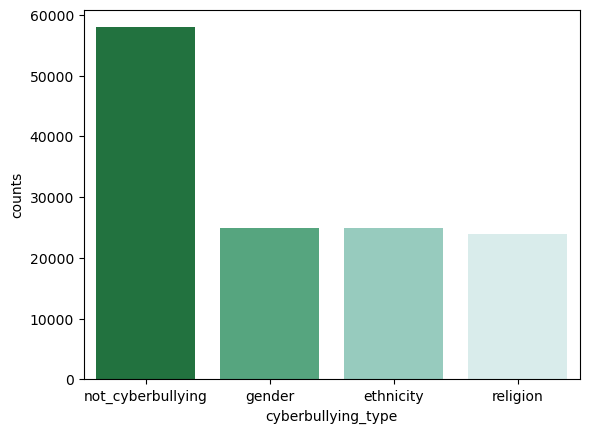

In [46]:
frequency_plot(res)

In [17]:
data['text'] = data['text'].astype(str)

In [14]:
# data['sentiment'], data['polarity_score'] = zip(*data['text'].apply(polarity_score))
# data.head()

In [93]:
# summary = polarity_summary(data)
# summary

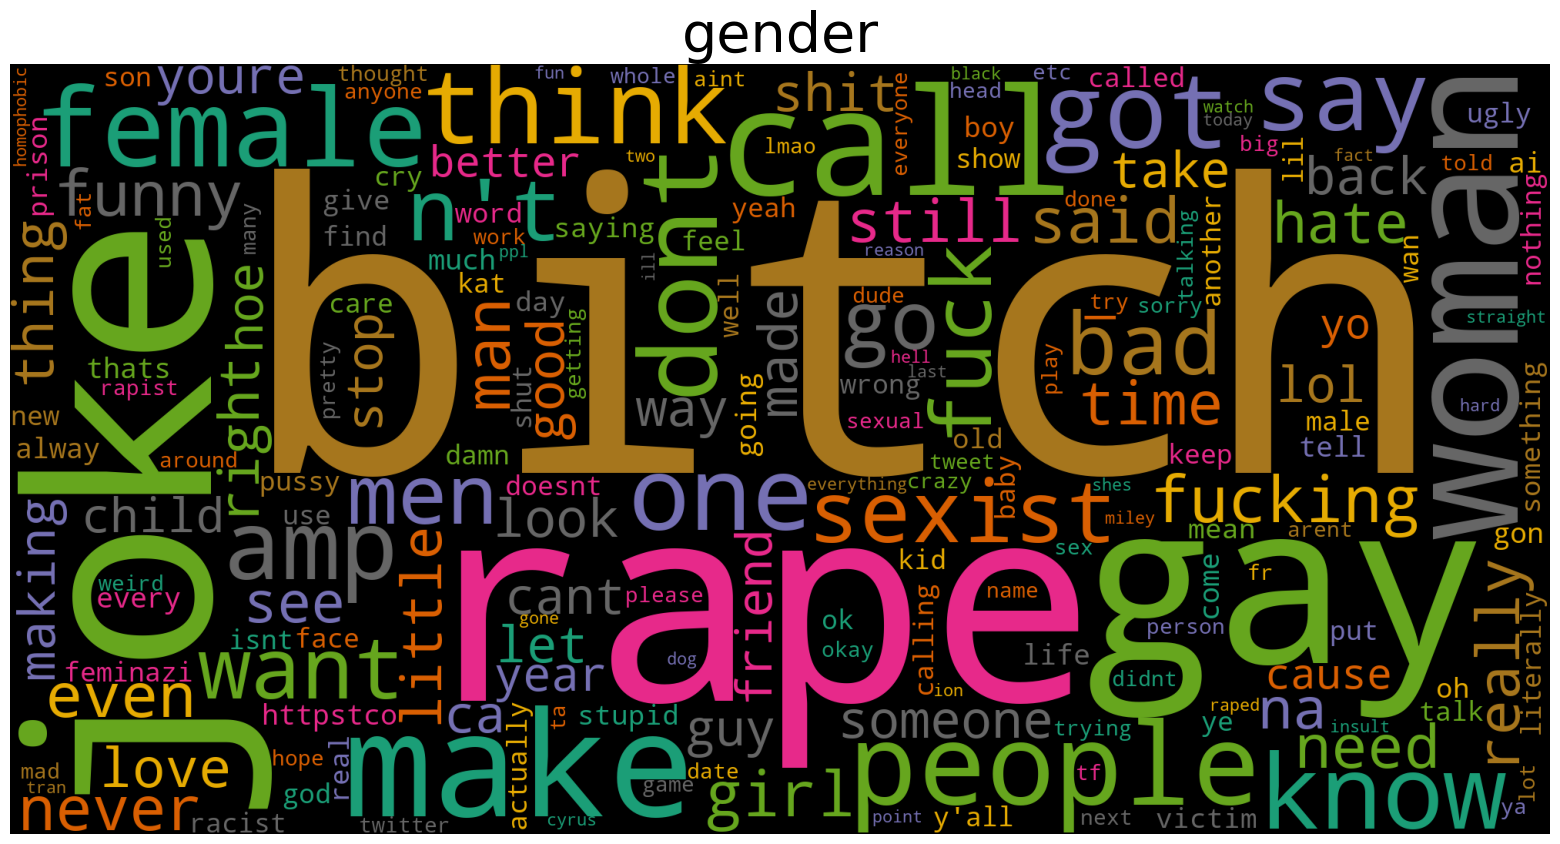

In [94]:
word_cloud(data,'gender')

C:\Users\ompra\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'let', 'mustn', 're', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.



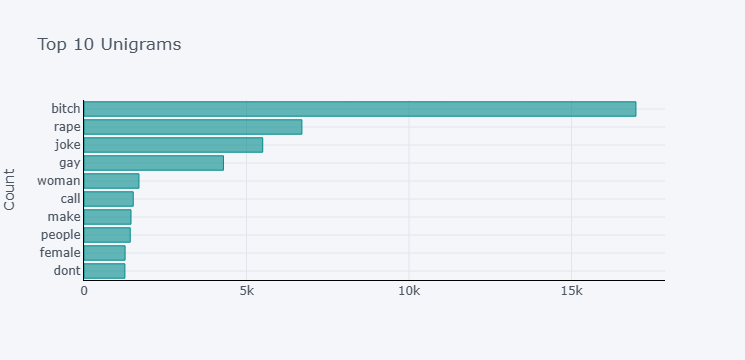

In [108]:
unigrams(data,'gender')

C:\Users\ompra\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'let', 'mustn', 're', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.



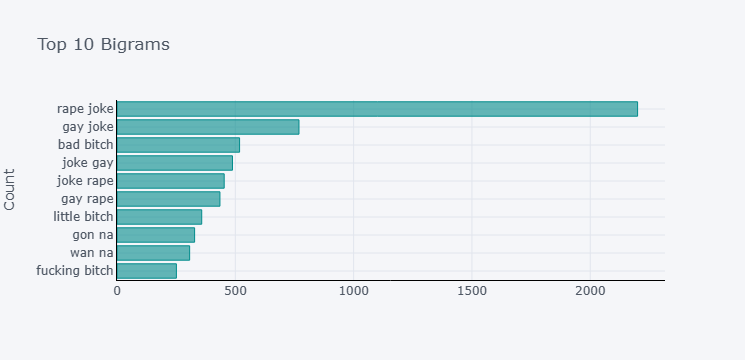

In [112]:
bigrams(data,'gender')

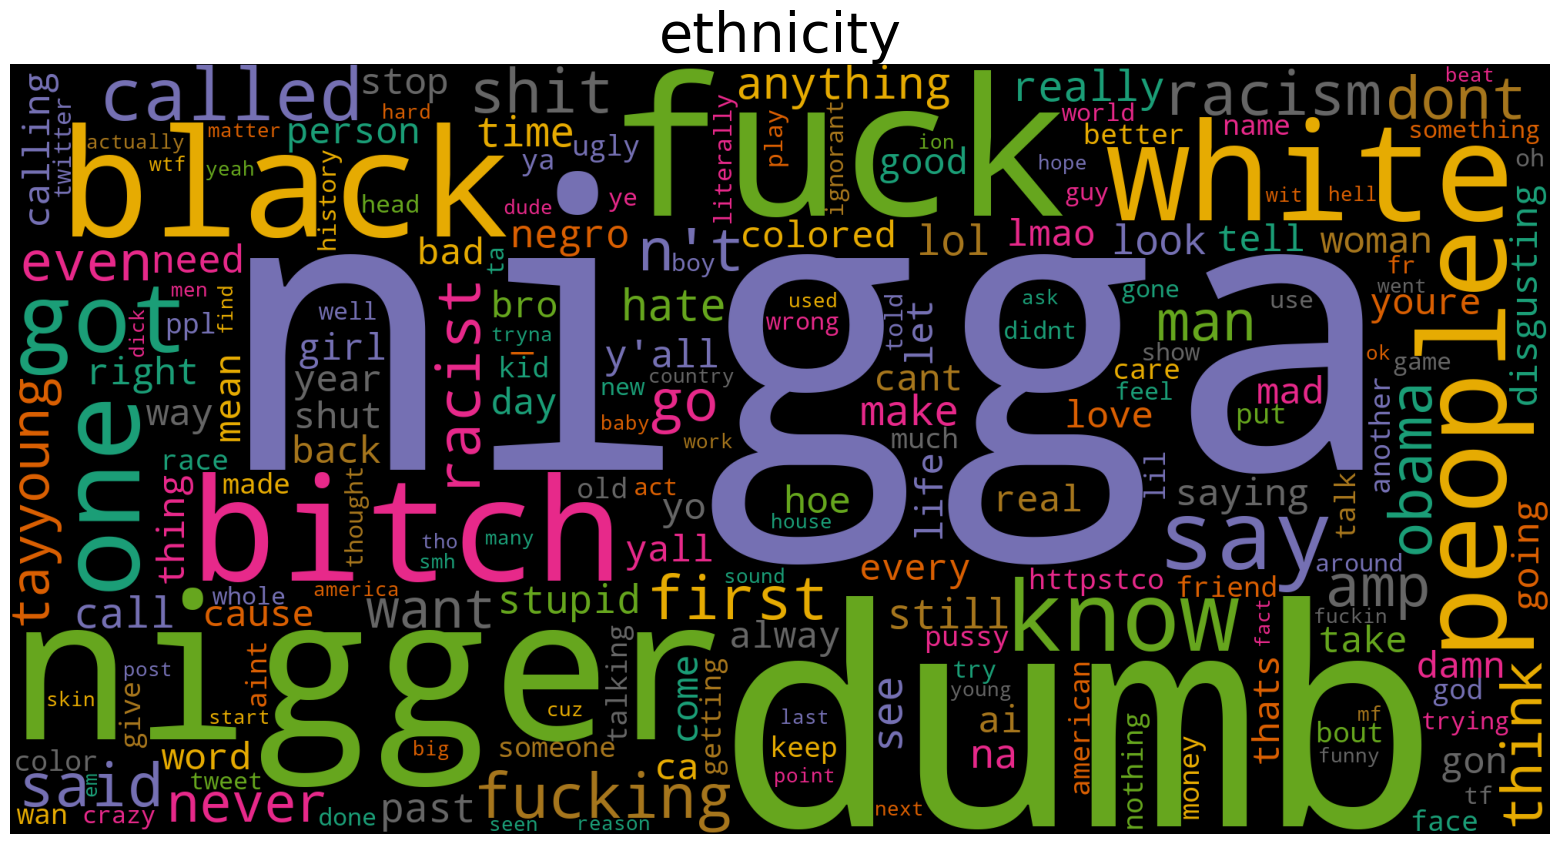

In [113]:
word_cloud(data,'ethnicity')

C:\Users\ompra\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'let', 'mustn', 're', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.



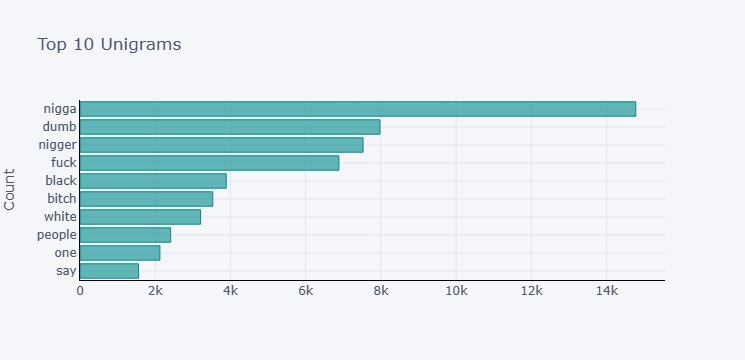

In [114]:
unigrams(data,'ethnicity')

C:\Users\ompra\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'let', 'mustn', 're', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.



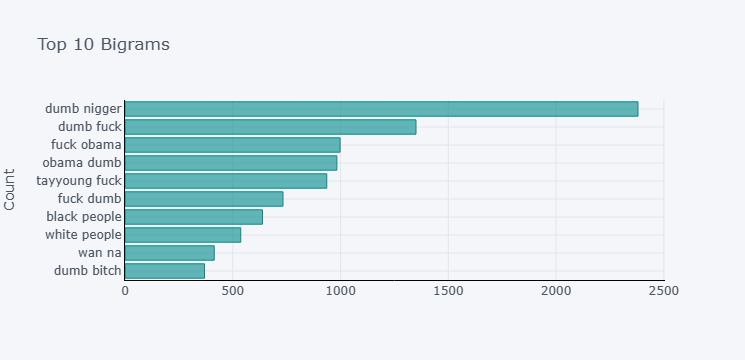

In [115]:
bigrams(data,'ethnicity')

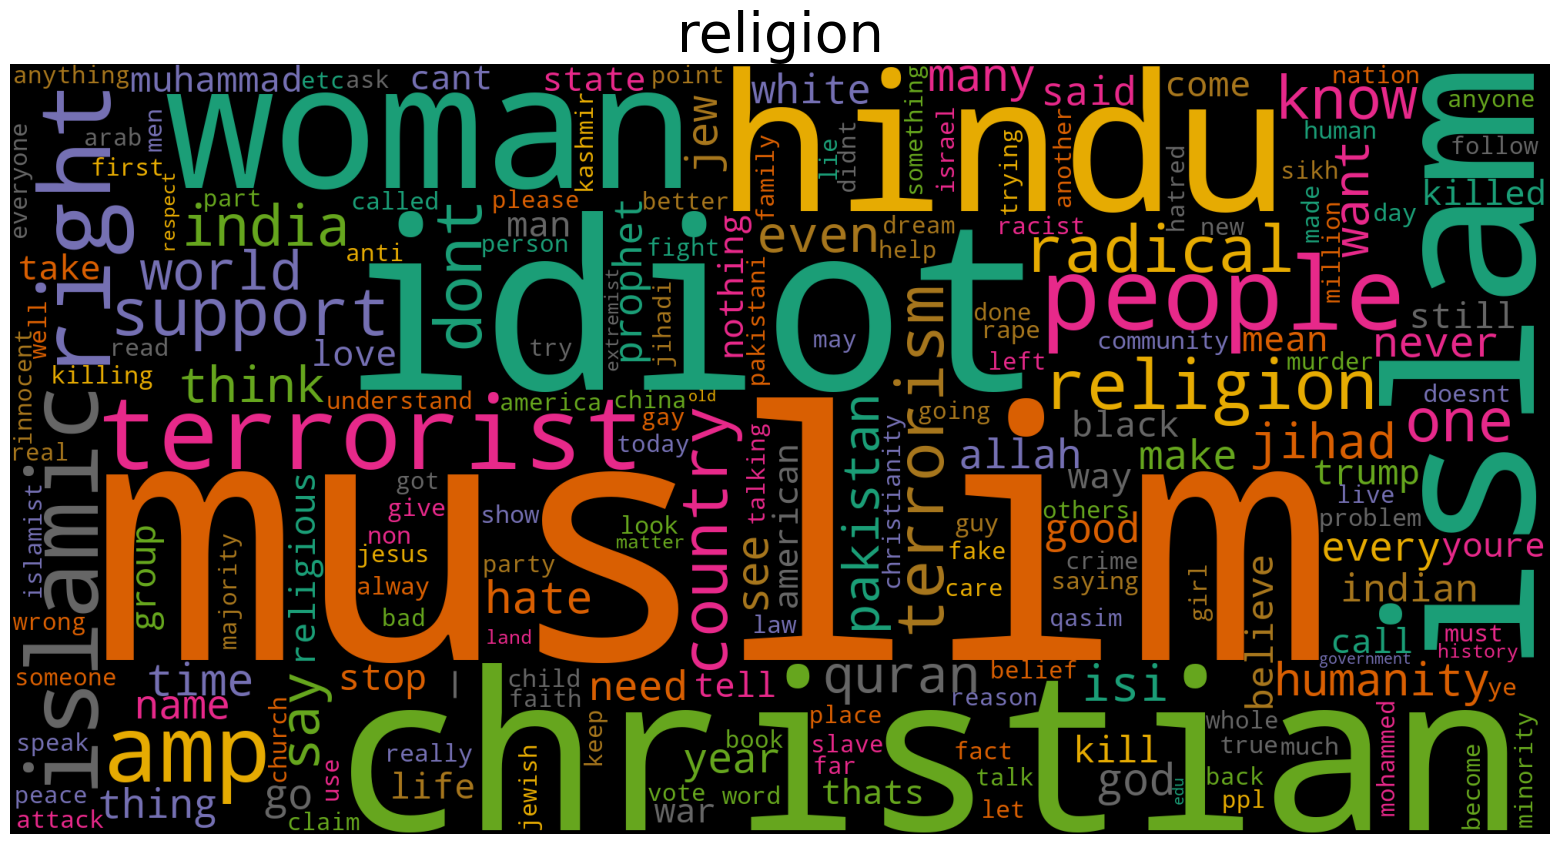

In [116]:
word_cloud(data,'religion')

C:\Users\ompra\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'let', 'mustn', 're', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.



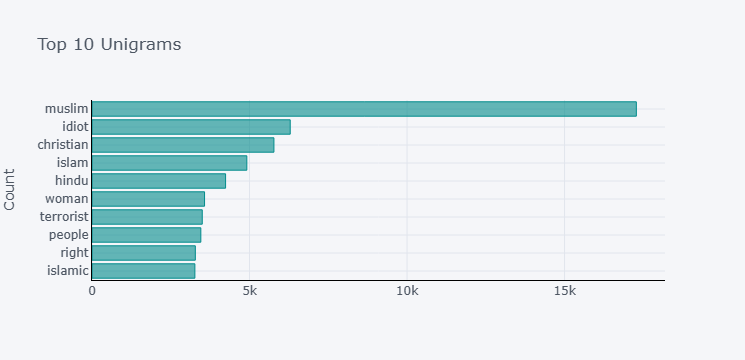

In [117]:
unigrams(data,'religion')

C:\Users\ompra\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'let', 'mustn', 're', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.



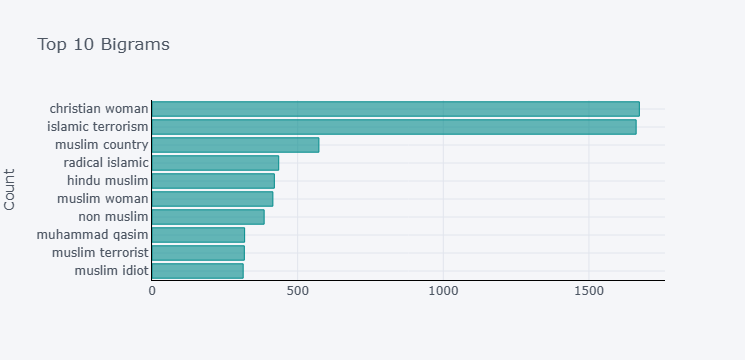

In [118]:
bigrams(data,'religion')

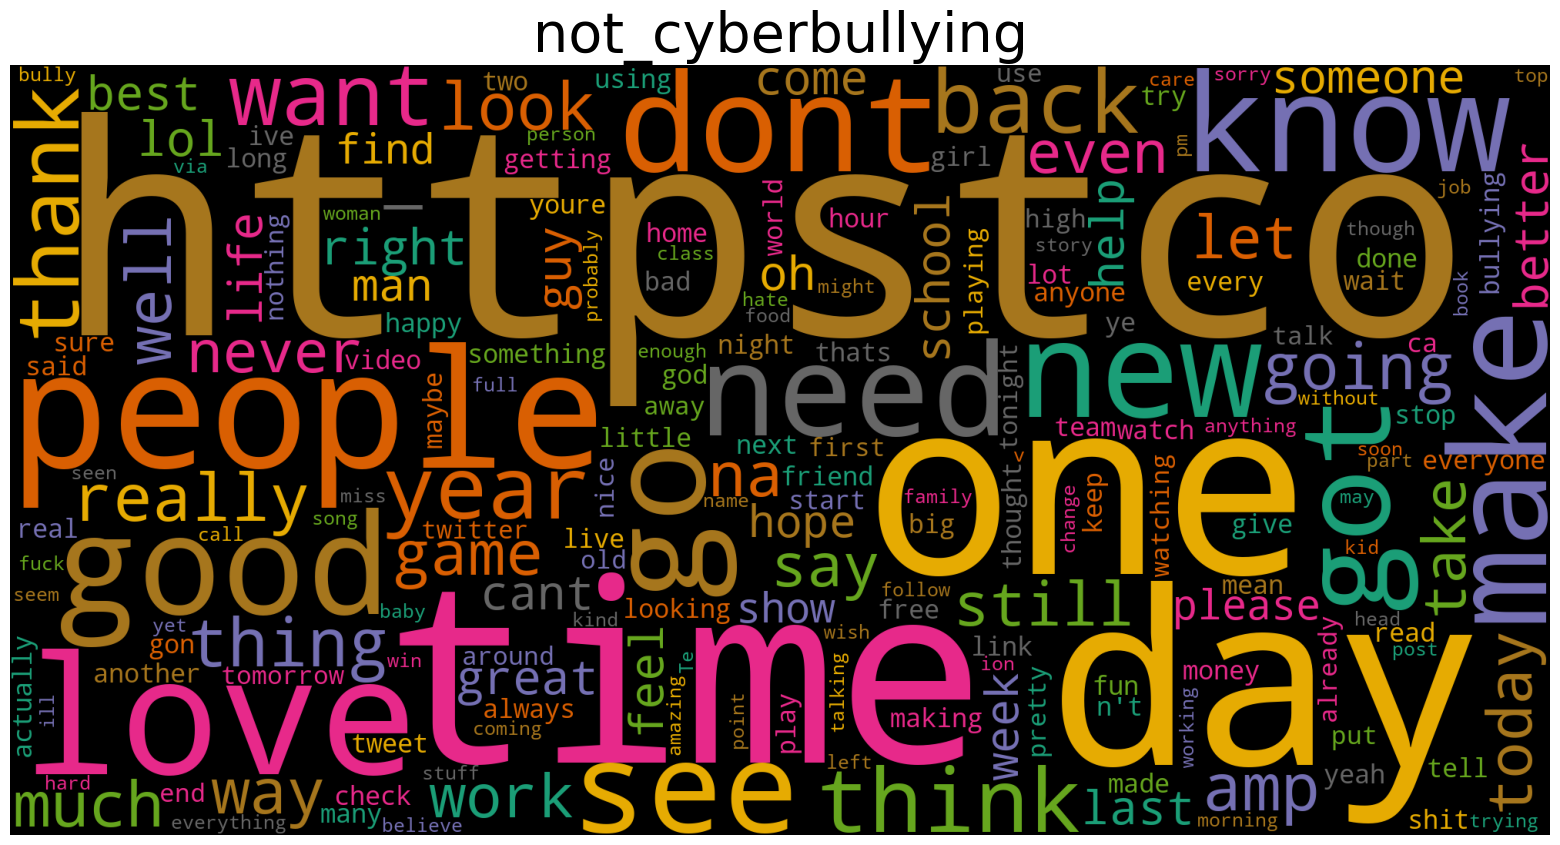

In [119]:
word_cloud(data,'not_cyberbullying')

C:\Users\ompra\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'let', 'mustn', 're', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.



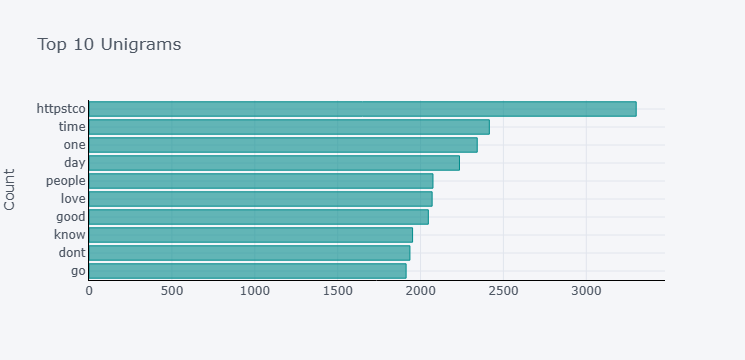

In [120]:
unigrams(data,'not_cyberbullying')

C:\Users\ompra\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'let', 'mustn', 're', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.



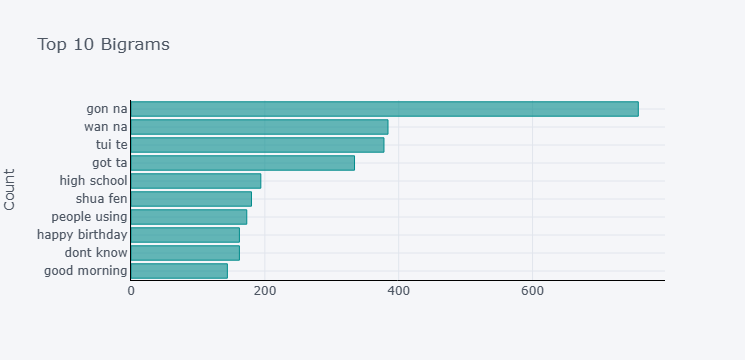

In [121]:
bigrams(data,'not_cyberbullying')